In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad('/root/datos/maestria/netopaas/luca/data/atlas/extended.h5ad')

In [19]:
adata_tumor = adata[adata.obs.cell_type_tumor.str.contains('Tumor'),:]

In [20]:
adata_tumor

View of AnnData object with n_obs × n_vars = 91528 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'is_hi

In [21]:
adata_tumor = adata_tumor[(adata_tumor.obs.origin == 'tumor_primary')]

# stages = ['III','III or IV', 'IV']
stages = ['I','II','III','III or IV', 'IV']
adata_tumor = adata_tumor[adata_tumor.obs.uicc_stage.isin(stages)]

# we remove these because some are enriched for endotheliar and some for immune cells
studies = ['Goveia_Carmeliet_2020','Leader_Merad_2021','Guo_Zhang_2018']
adata_tumor = adata_tumor[~adata_tumor.obs.study.isin(studies)]

adata_tumor = adata_tumor[:, adata_tumor.var.is_highly_variable == 'True']

In [34]:
adata

View of AnnData object with n_obs × n_vars = 402634 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'is_h

In [36]:
adata = adata[:,adata.var.is_highly_variable == 'True']

In [3]:
adata = adata[(adata.obs.origin == 'tumor_primary')]


# stages = ['III','III or IV', 'IV']
stages = ['I','II','III','III or IV', 'IV']
adata = adata[adata.obs.uicc_stage.isin(stages)]

# we remove these because some are enriched for endotheliar and some for immune cells
studies = ['Goveia_Carmeliet_2020','Leader_Merad_2021','Guo_Zhang_2018']
adata = adata[~adata.obs.study.isin(studies)]

adata = adata[:,adata.var.is_highly_variable == 'True']

In [22]:
adata_tumor.X = adata_tumor.layers['counts_length_scaled']

In [23]:
adata_tumor = adata_tumor.copy()

In [10]:
sc.pp.neighbors(adata_tumor, n_pcs=30)
sc.tl.umap(adata_tumor)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.11/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
2024-08-07 17:07:15.380372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 17:07:15.380417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 17:07:15.382043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 17:07:15.390899: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable

In [11]:
sc.tl.leiden(adata_tumor, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata_tumor, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata_tumor, key_added="leiden_res1", resolution=1.0)

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


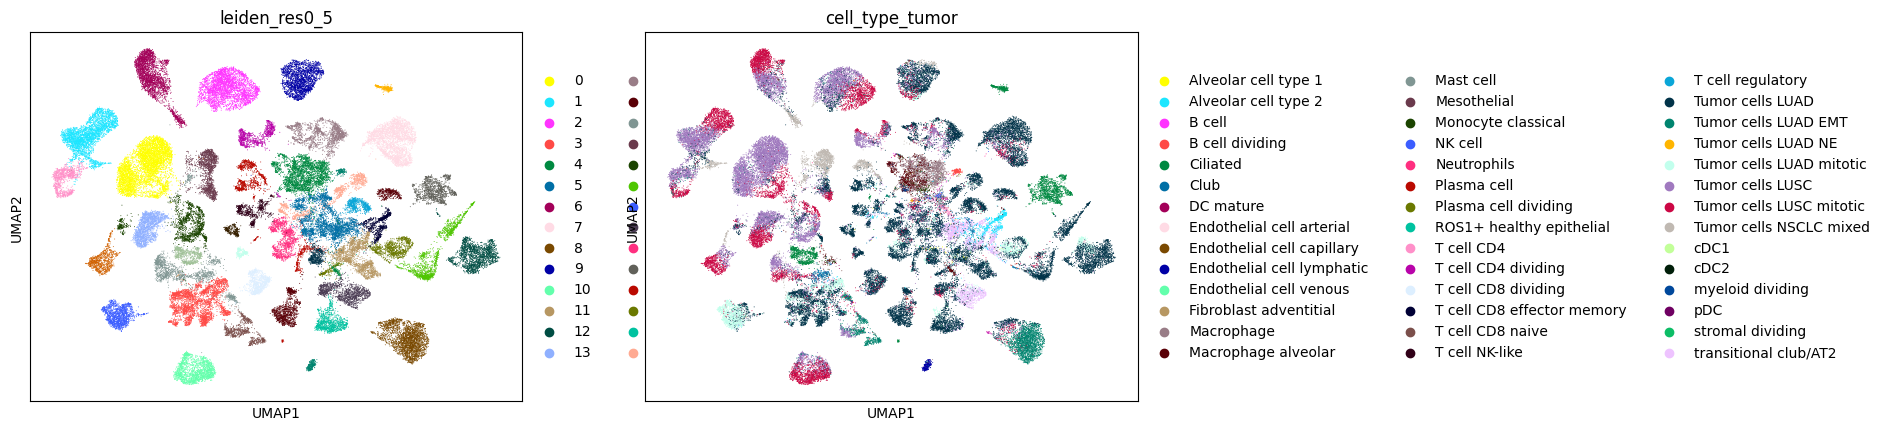

In [17]:
sc.pl.umap(adata_tumor, color=['leiden_res0_5','cell_type_tumor'])

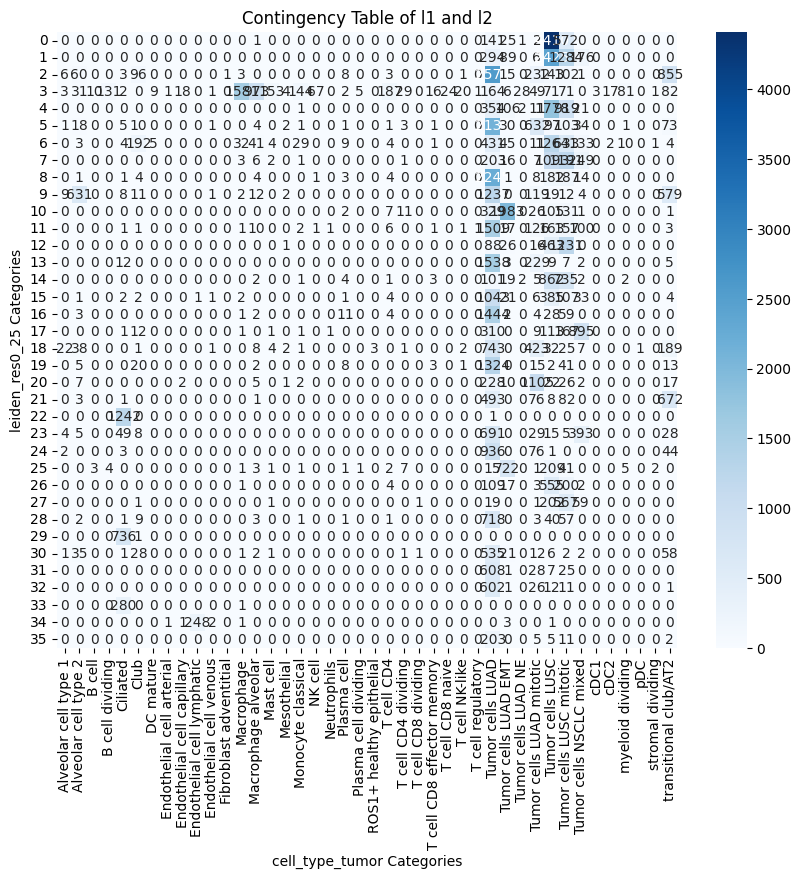

In [14]:
import anndata as ad
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `adata` is your AnnData object and the two obs columns are 'col1' and 'col2'
# Replace 'col1' and 'col2' with your actual column names
col1 = 'leiden_res0_25'
col2 = 'cell_type_tumor'

# Extract the two columns from the obs dataframe
labels1 = adata_tumor.obs[col1]
labels2 = adata_tumor.obs[col2]

contingency_table = pd.crosstab(labels1, labels2)

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.xlabel(f'{col2} Categories')
plt.ylabel(f'{col1} Categories')
plt.title('Contingency Table of l1 and l2')
plt.show()


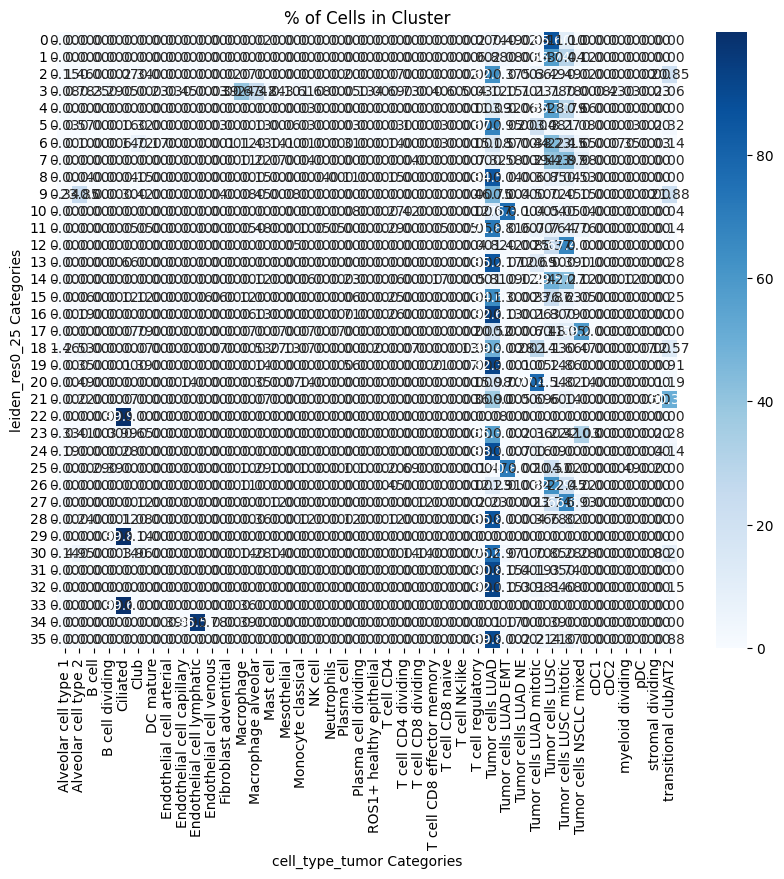

In [15]:
import anndata as ad
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `adata` is your AnnData object and the two obs columns are 'col1' and 'col2'
# Replace 'col1' and 'col2' with your actual column names
col1 = 'leiden_res0_25'
col2 = 'cell_type_tumor'

# Extract the two columns from the obs dataframe
labels1 = adata_tumor.obs[col1]
labels2 = adata_tumor.obs[col2]

# Create the contingency table
contingency_table = pd.crosstab(labels1, labels2)

# Normalize the table to get percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Visualize the matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table_percentage, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel(f'{col2} Categories')
plt.ylabel(f'{col1} Categories')
plt.title('% of Cells in Cluster')
plt.show()